### Actividad Guiada 2

#### Ignacio Guerra Sevillano

[Link GitHub](https://github.com/guerritaz/03MIAR---Algoritmos-de-Optimizacion/tree/main)

In [72]:
import math
import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as linalg
import random

Primera función: 

Solucion: [3.450502372125974e-11, -1.6597659095449697e-09] 2.7560134711496455e-18


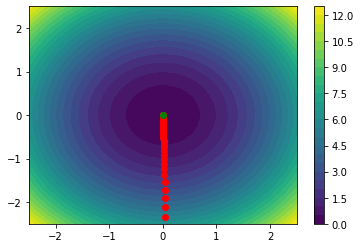

In [73]:
f = lambda x : x[0]**2 + x[1]**2
df = lambda x : [2*x[0], 2*x[1]]

# Prepara los datos para dobujar mapa de niveles de Z
resolucion = 30
rango = 2.5
X = np.linspace(-rango, rango, resolucion)
Y = np.linspace(-rango, rango, resolucion)
Z = np.zeros((resolucion, resolucion))

for ix,x in enumerate(X):
    for iy,y in enumerate(Y):
        Z[ix,iy] = f([x,y])

contour = plt.contourf(X,Y,Z, resolucion)
cbar = plt.colorbar(contour)

# Generar punto de partida aleatorio
P = [random.uniform(-rango,rango), random.uniform(-rango,rango)]
plt.plot(P[0], P[1], "o", c="red")

TA = 0.05

for _ in range(200):
    grad = df(P)
    P[0], P[1] = P[0] - TA*grad[0], P[1] - TA*grad[1]
    plt.plot(P[0], P[1], "o", c="red")

plt.plot(P[0], P[1], "o", c="green")
print("Solucion:" , P, f(P))

Segunda función. En este caso vamos ajustando la tasa de aprendizaje en cada iteración de la siguiente manera:

$$TA_0 = 0.005 \quad TA_n= \frac{|(x_n-x_{n-1}) \cdot ( \nabla f(x_n)- \nabla f(x_{n-1})|}{\|{\nabla f(x_n)- \nabla f(x_{n-1})\|^2}}, $$

donde $f$ es nuestra función y los $x_n$ son los puntos de cada iteración.

Solucion: [2.659166350133376, -2.7046977973977437] -0.9994802547797319


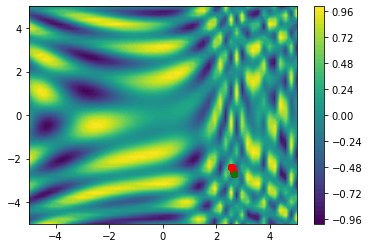

In [74]:
# Definimos la función
f2 = lambda x : np.sin(0.5*x[0]**2 - 0.25 * x[1]**2 + 3) * np.cos(2*x[0] + 1 - np.exp(x[1]))

def df2(PUNTO):
    h = 0.01
    T = np.copy(PUNTO)
    grad = np.zeros(2)                                                             
    for it, th in enumerate(PUNTO):
        T[it] = T[it] + h
        grad[it] = (f2(T) - f2(PUNTO)) / h
    return grad


# Prepara los datos para dobujar mapa de niveles de Z
resolucion = 50
rango = 5
X = np.linspace(-rango, rango, resolucion)
Y = np.linspace(-rango, rango, resolucion)
Z = np.zeros((resolucion, resolucion))

for ix,x in enumerate(X):
    for iy,y in enumerate(Y):
        Z[ix,iy] = f2([x,y])

contour = plt.contourf(X,Y,Z, resolucion)
cbar = plt.colorbar(contour)

# Generar punto de partida aleatorio
P = [random.uniform(-rango,rango), random.uniform(-rango,rango)]
plt.plot(P[0], P[1], "o", c="red")

# Tasa de aprendizaje inicial
TA = 0.005

for _ in range(30):
    grad = df2(P)
    Q = P.copy()
    P[0], P[1] = P[0] - TA*grad[0], P[1] - TA*grad[1]
    grad_new = df2(P)
    
    u = np.array(P) - np.array(Q)
    v = np.array(grad_new) - np.array(grad)
    
    # La tasa de aprendizaje se va ajustando
    TA = abs(np.dot(u, v)) / linalg.norm(v)**2
    plt.plot(P[0], P[1], "o", c="red")

plt.plot(P[0], P[1], "o", c="green")
print("Solucion:" , P, f2(P))